# Problem Statement

## How is the ACT test situation in the US? The likelihood of taking it, overall, reflects the quality of the score.

Which states have the highest and lowest participation rates for the 2017, 2018, or 2019 ACT?
Which states have the highest and lowest mean total/composite scores for the 2017, 2018, or 2019 and ACT?
Do any states with 100% participation on a given test have a rate change year-to-year?

# Import

In [2045]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [2046]:
act_2017 = pd.read_csv('data/act_2017.csv')
act_2018 = pd.read_csv('data/act_2018.csv')
act_2019 = pd.read_csv('data/act_2019.csv')
sat_2017 = pd.read_csv('data/sat_2017.csv')
sat_2018 = pd.read_csv('data/sat_2018.csv')
sat_2019 = pd.read_csv('data/sat_2019.csv')
region_state = pd.read_csv('data/us_regions_divisions.csv')

## Data Formatting

In [2048]:
# Create a new DataFrame with only the common columns for act_2017
act_2017_common = act_2017[['State', 'Participation', 'Composite']].copy()
# Avoid SettingWithCopyWarning with .copy()

# Add a 'Year' column to each DataFrame
act_2017_common['Year'] = 2017
act_2018['Year'] = 2018
act_2019['Year'] = 2019

# Concatenate the DataFrames
full_act = pd.concat([act_2017_common, act_2018, act_2019], ignore_index=True)

# Remove '%' sign from 'Participation' and convert to numeric in one step
full_act['Participation'] = pd.to_numeric(full_act['Participation'].str.replace('%', ''), errors='coerce')
full_act['Composite'] = pd.to_numeric(full_act['Composite'], errors='coerce')
full_act['State'] = full_act['State'].str.lower()
region_state['State'] = region_state['State'].str.lower()

In [2049]:
sat_2019

,State,Participation Rate,EBRW,Math,Total
0,Alabama,7%,583,560,1143
1,Alaska,41%,556,541,1097
2,Arizona,31%,569,565,1134
3,Arkansas,6%,582,559,1141
4,California,63%,534,531,1065
5,Colorado,100%,518,506,1024
6,Connecticut,100%,529,516,1046
7,Delaware,100%,499,486,985
8,District of Columbia,94%,495,480,975
9,Florida,100%,516,483,999


In [2050]:
# Create a new DataFrame with only the common columns for set
sat_2017 = sat_2017[['State', 'Participation']].copy()
sat_2018 = sat_2018[['State', 'Participation']].copy()
sat_2019.rename(columns={'Participation Rate': 'Participation'}, inplace=True)
sat_2019 = sat_2019[['State', 'Participation']].copy()
# Add a 'Year' column to each DataFrame
sat_2017['Year'] = 2017
sat_2018['Year'] = 2018
sat_2019['Year'] = 2019

# Concatenate the DataFrames
full_sat = pd.concat([sat_2017, sat_2018, sat_2019], ignore_index=True)
# Remove '%' sign from 'Participation' and convert to numeric in one step
full_sat['Participation'] = pd.to_numeric(full_sat['Participation'].str.replace('%', ''), errors='coerce')
full_sat['State'] = full_sat['State'].str.lower()

In [2051]:
full_act.rename(columns={'State': 'state', 
    'Participation': 'participation', 
    'Composite': 'composite', 
    'Year': 'year'}, inplace=True)

full_sat.rename(columns={'State': 'state', 
    'Participation': 'participation',  
    'Year': 'year'}, inplace=True)

region_state.rename(columns={'State': 'state', 
    'State Code': 'state_code', 
    'Region': 'region', 
    'Division': 'division'}, inplace=True)

## Data Exploration

In [2053]:
full_act.head()

,state,participation,composite,year
0,national,60,21.0,2017
1,alabama,100,19.2,2017
2,alaska,65,19.8,2017
3,arizona,62,19.7,2017
4,arkansas,100,19.4,2017


In [2054]:
full_sat.head()

,state,participation,year
0,alabama,5.0,2017
1,alaska,38.0,2017
2,arizona,30.0,2017
3,arkansas,3.0,2017
4,california,53.0,2017


In [2055]:
full_act.dtypes

state             object
participation      int64
composite        float64
year               int64
dtype: object

In [2056]:
full_sat.dtypes

state             object
participation    float64
year               int64
dtype: object

In [2057]:
full_act.nunique()

state            52
participation    64
composite        63
year              3
dtype: int64

In [2058]:
full_sat.nunique()

state            53
participation    61
year              3
dtype: int64

In [2059]:
full_act.head()

,state,participation,composite,year
0,national,60,21.0,2017
1,alabama,100,19.2,2017
2,alaska,65,19.8,2017
3,arizona,62,19.7,2017
4,arkansas,100,19.4,2017


In [2060]:
full_sat.head()

,state,participation,year
0,alabama,5.0,2017
1,alaska,38.0,2017
2,arizona,30.0,2017
3,arkansas,3.0,2017
4,california,53.0,2017


In [2061]:
# Check for duplicates in State/Year combinations
duplicates = full_act[full_act.duplicated(subset=['state', 'year'], keep=False)]

if not duplicates.empty:
    print("Warning: Duplicate State/Year combinations found:")
    print(duplicates)
    
    # Optional: Remove duplicates, keeping the first occurrence using the `keep` parameter
    full_act = full_act.drop_duplicates(subset=['state', 'year'], keep='first')
    print("Duplicates have been removed, keeping the first occurrence.")
else:
    print("No duplicates found in State/Year combinations.")

    state  participation  composite  year
71  maine              7       24.0  2018
72  maine              7       24.0  2018
Duplicates have been removed, keeping the first occurrence.


In [2062]:
if not duplicates.empty:
    full_sat = full_sat.drop_duplicates(subset=['state', 'year'], keep='first')
    print("Duplicates have been removed, keeping the first occurrence.")
else:
    print("No duplicates found in State/Year combinations.")

Duplicates have been removed, keeping the first occurrence.


In [2063]:
full_sat

,state,participation,year
0,alabama,5.0,2017
1,alaska,38.0,2017
2,arizona,30.0,2017
3,arkansas,3.0,2017
4,california,53.0,2017
...,...,...,...
150,virginia,68.0,2019
151,washington,70.0,2019
152,west virginia,99.0,2019
153,wisconsin,3.0,2019


In [2064]:
national_index = full_act[full_act['state'] == 'national'].index
full_act = full_act.drop(national_index).reindex()
full_act

,state,participation,composite,year
1,alabama,100,19.2,2017
2,alaska,65,19.8,2017
3,arizona,62,19.7,2017
4,arkansas,100,19.4,2017
5,california,31,22.8,2017
...,...,...,...,...
150,virginia,21,24.0,2019
151,washington,24,22.1,2019
152,west virginia,49,20.8,2019
153,wisconsin,100,20.3,2019


# Visualization

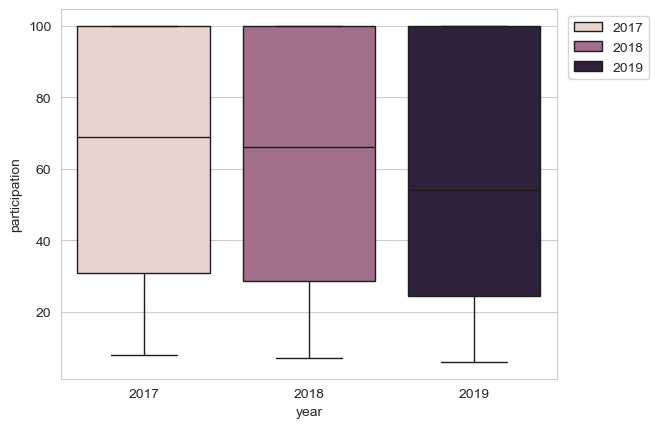

In [2066]:
sns.boxplot(x='year', y='participation', data=full_act, hue='year')
plt.legend(bbox_to_anchor=(1.20, 1), loc='upper right')
plt.show()

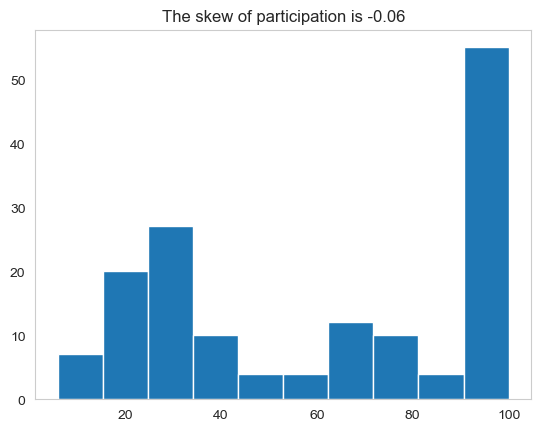

In [2067]:
full_act['participation'].skew()
full_act['participation'].hist(grid=False);
plt.title(f"The skew of participation is {full_act['participation'].skew().round(2)}");

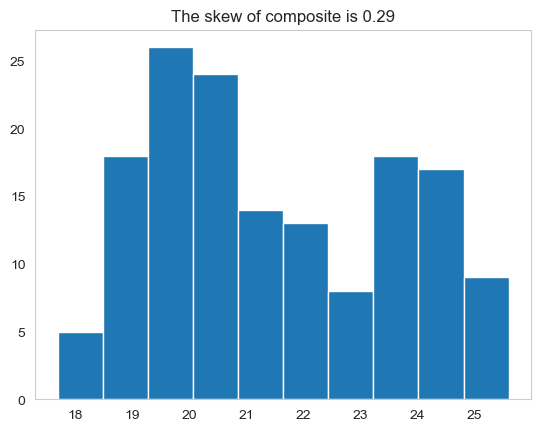

In [2068]:
full_act['composite'].skew()
full_act['composite'].hist(grid=False);
plt.title(f"The skew of composite is {full_act['composite'].skew().round(2)}");

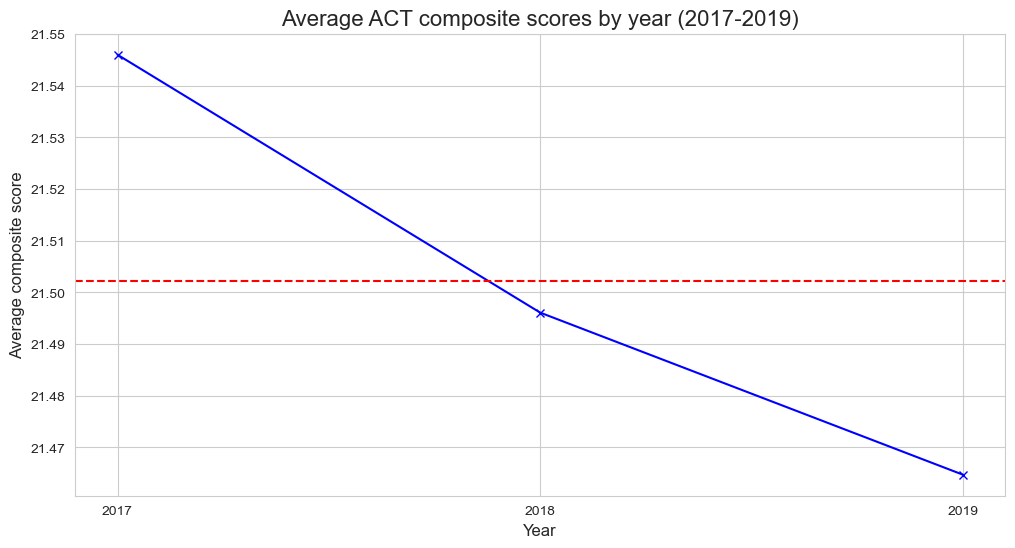

In [2069]:
# Plot a line graph for composite scores over years
plt.figure(figsize=(12, 6))

# Group by year and calculate average composite score

avg_composite_by_year = full_act.groupby('year')['composite'].mean()
mean_composite_score = avg_composite_by_year.mean()
# Plot
plt.plot(avg_composite_by_year.index.values.astype(str), avg_composite_by_year.values, marker='x', linestyle='-', color='blue')
plt.axhline(y=mean_composite_score, linestyle='--', color='red', label='Mean Composite Score')
plt.title('Average ACT composite scores by year (2017-2019)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average composite score', fontsize=12)
plt.grid(True)
plt.savefig('img/avg_composite_by_year.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

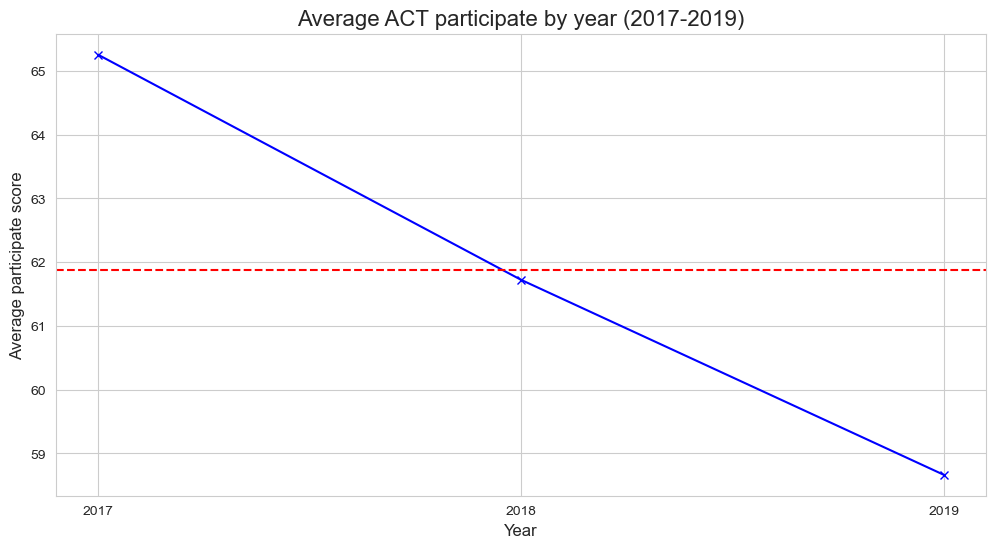

In [2070]:
# Plot a line graph for composite scores over years
plt.figure(figsize=(12, 6))

# Group by year and calculate average composite score

avg_participate_by_year = full_act.groupby('year')['participation'].mean()
mean_composite_score = avg_participate_by_year.mean()

# Plot
plt.plot(avg_participate_by_year.index.values.astype(str), avg_participate_by_year.values, marker='x', linestyle='-', color='blue')
plt.axhline(y=mean_composite_score, linestyle='--', color='red', label='Mean Composite Score')
plt.title('Average ACT participate by year (2017-2019)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average participate score', fontsize=12)
plt.grid(True)
plt.savefig('img/avg_participate_by_year.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

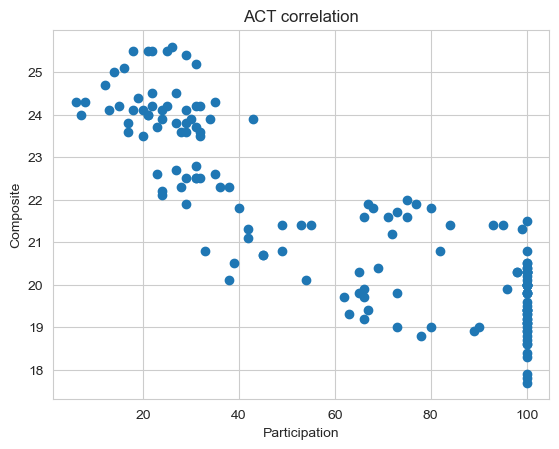

In [2071]:
correlation = full_act['participation'].corr(full_act['composite'])
plt.scatter(full_act['participation'],full_act['composite'])


plt.title("ACT correlation")
plt.ylabel("Composite", fontsize = 10)
plt.xlabel("Participation", fontsize = 10);
plt.savefig('img/scatter_p_c.png', dpi=300, bbox_inches='tight')

In [2072]:
correlation

-0.8594602116733696

mean_participation = full_act['participation'].mean()
states_below_average = full_act[full_act['participation'] < mean_participation]

unique_state=states_below_average['state'].unique()
plt.figure(figsize=(12, 6))
trends_below_average = full_act[full_act['state'].isin(unique_state)]
# Loop through each unique state and plot its participation trend
for state in unique_state:
    state_data = trends_below_average[trends_below_average['state'] == state]
    plt.plot(state_data['year'].astype(str), state_data['participation'], marker='*', label=state);

# Add labels and title
# Add a mean line as a benchmark
plt.title('Participation Trends for States Below Average Participation', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Participation Rate (%)', fontsize=12);
plt.savefig('Participation_trend.png', dpi=300, bbox_inches='tight')

In [2074]:
decreasing_states = []
for state, group in full_act.groupby('state'):
    participation_change = group['participation'].pct_change() * 100  
    mean_change = participation_change.mean()
    decreasing_states.append((state, mean_change))
    decreasing_states_df = pd.DataFrame(results, columns=['state','mean_change']).sort_values(by='mean_change')


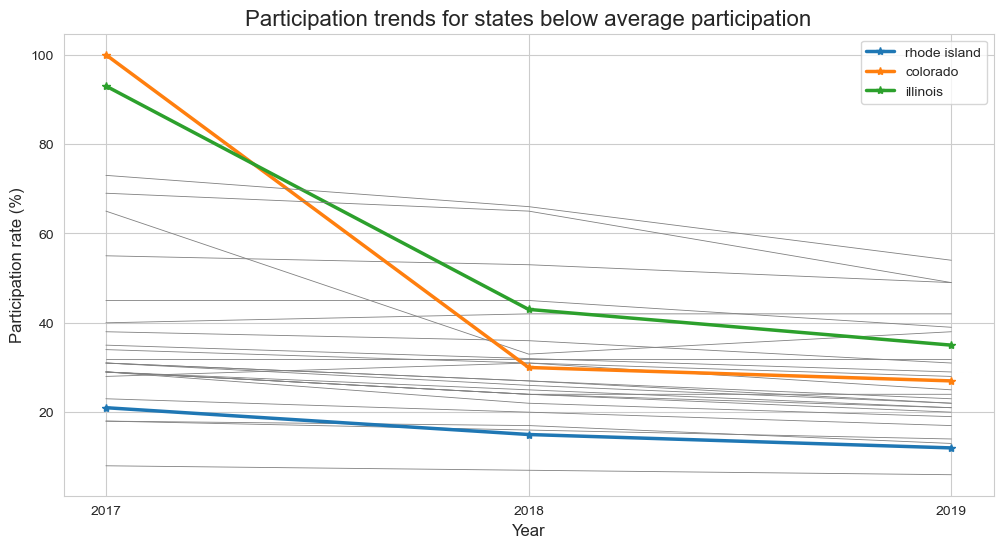

In [2075]:
mean_participation = full_act['participation'].mean()
states_below_average = full_act[full_act['participation'] < mean_participation]
unique_state = states_below_average['state'].unique()

decreasing_states = []
for state, group in full_act.groupby('state'):
    participation_change = group['participation'].pct_change() * 100  
    mean_change = participation_change.mean()
    decreasing_states.append((state, mean_change))
    decreasing_states_df = pd.DataFrame(decreasing_states, columns=['state', 'mean_change']).sort_values(by='mean_change')


top_3_decreasing_states = decreasing_states_df['state'].head(3)

plt.figure(figsize=(12, 6))
trends_below_average = full_act[full_act['state'].isin(unique_state)]


for state in unique_state:
    state_data = trends_below_average[trends_below_average['state'] == state]
    if state in top_3_decreasing_states.values:
        plt.plot(state_data['year'].astype(str), state_data['participation'], marker='*', label=state, linewidth=2.5)
    else:
        plt.plot(state_data['year'].astype(str), state_data['participation'], color='gray', linestyle='-', linewidth=0.6)


plt.title('Participation trends for states below average participation', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Participation rate (%)', fontsize=12)
plt.legend()


plt.savefig('img/participation_decrease.png', dpi=300, bbox_inches='tight')
plt.show()


In [2076]:
results_df.head(5)

,state,mean_change
5,colorado,-40.000000
13,illinois,-36.184046
39,rhode island,-24.285714
22,michigan,-18.887147
1,alaska,-17.039627


In [2077]:
full_act.head(5)

,state,participation,composite,year
1,alabama,100,19.2,2017
2,alaska,65,19.8,2017
3,arizona,62,19.7,2017
4,arkansas,100,19.4,2017
5,california,31,22.8,2017


In [2078]:
region_state.head(5)

,state,state_code,region,division
0,alaska,AK,West,Pacific
1,alabama,AL,South,East South Central
2,arkansas,AR,South,West South Central
3,arizona,AZ,West,Mountain
4,california,CA,West,Pacific


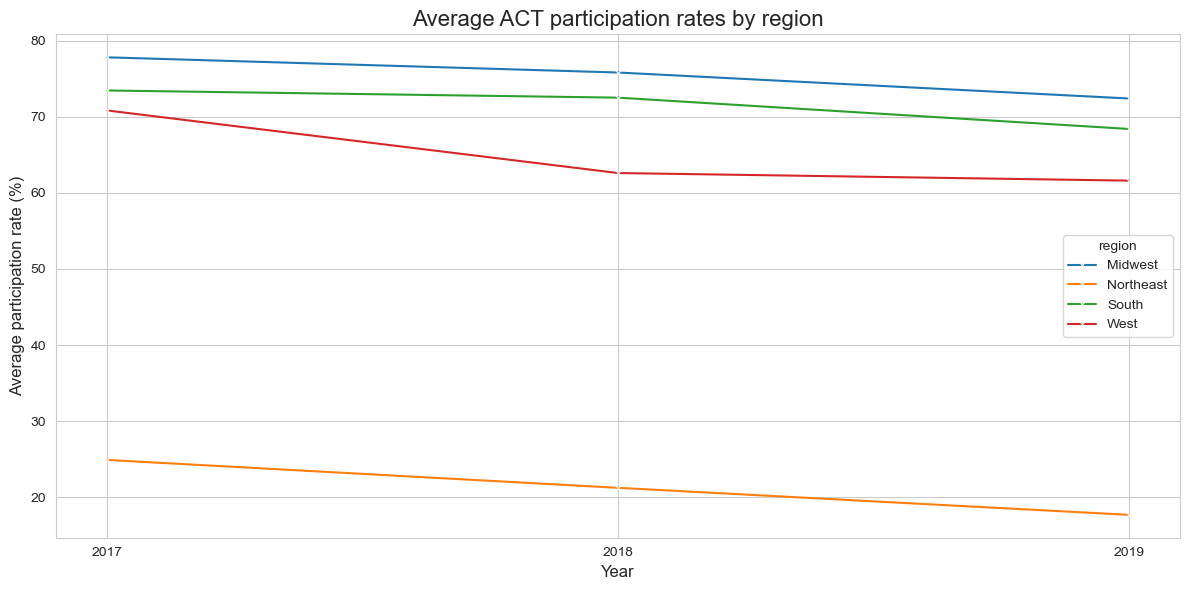

In [2079]:
full_act_with_region=full_act.merge(region_state, on='state', how='left')
avg_by_region = full_act_with_region.groupby(['year', 'region'])['participation'].mean().reset_index()

plt.figure(figsize=(12, 6))
avg_by_region['year'] = avg_by_region['year'].astype(str)
sns.lineplot(data=avg_by_region, x='year', y='participation', hue='region', marker='x')

plt.title('Average ACT participation rates by region', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average participation rate (%)', fontsize=12)

plt.tight_layout()
plt.savefig('img/avg_participate_by_region.png', dpi=300)
plt.show()

In [2080]:
full_sat_with_region=full_sat.merge(region_state, on='state', how='left')


In [2081]:
s_increasing_states = []
selected_states = ['colorado', 'illinois', 'rhode island']

for state in selected_states:
    # Get the group for the specific state
    group = full_sat_with_region[full_sat_with_region['state'] == state]
    s_participation_change = group['participation'].pct_change() * 100  
    s_mean_change = s_participation_change.mean()
    s_increasing_states.append((state, s_mean_change))
    s_increasing_states_df = pd.DataFrame(s_increasing_states, columns=['state', 's_mean_change']).sort_values(by='s_mean_change')

In [2082]:
s_increasing_states_df

,state,s_mean_change
2,rhode island,19.856251
0,colorado,404.545455
1,illinois,500.505051


<Figure size 1600x1200 with 0 Axes>

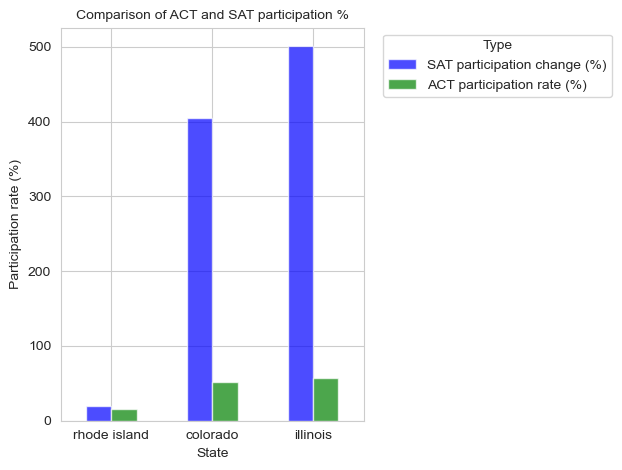

In [2083]:
# Merge ACT and SAT data for the selected states
merged_participation = pd.merge(s_increasing_states_df, act_mean_participation, on='state', how='inner')
merged_participation.columns = ['state', 'sat_mean_change', 'act_mean_participation']
merged_participation.set_index('state', inplace=True)

# Create a bar chart
plt.figure(figsize=(16, 12))
merged_participation[['sat_mean_change', 'act_mean_participation']].plot(kind='bar', color=['blue', 'green'], alpha=0.7)

plt.title('Comparison of ACT and SAT participation %', fontsize=10)
plt.xlabel('State', fontsize=10)
plt.ylabel('Participation rate (%)', fontsize=10)
plt.xticks(rotation=0);
plt.legend(title='Type', labels=['SAT participation change (%)', 'ACT participation rate (%)'],loc='best', bbox_to_anchor=(1.04, 1))

plt.tight_layout()
plt.savefig('img/participation_comparison.png', dpi=300);
plt.show();